In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import datetime
import time

import os, os.path
from os import listdir
from os.path import isfile, join

import re
# from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import sys

# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
import NASA_core as nc
import NASA_plot_core as npc

### Set up directories

In [2]:
data_dir = "/Users/hn/Documents/01_research_data/NASA/VI_TS/05_fifth_investigation/"
param_dir = "/Users/hn/Documents/00_GitHub/Ag/NASA/parameters/"

plot_dir = "/Users/hn/Documents/01_research_data/NASA/for_paper/plots/raw_statsPlots/"
os.makedirs(plot_dir, exist_ok=True)

In [ ]:
irrigatedAnnuals = pd.read_csv(param_dir + "irrigatedAnnuals.csv")

In [ ]:
file_names = [x for x in os.listdir(data_dir) if x.endswith(".csv")]
file_names = [x for x in file_names if "variance" in x]
np.sort(file_names).tolist()

In [5]:
file_names_correct = [x for x in file_names if "correctYear" in x]
file_names_wrong = [x for x in file_names if "WrongYear" in x]

In [6]:
np.sort(file_names_correct).tolist()

['Eastern_WA_2017_07_variance_correctYear.csv',
 'Eastern_WA_2017_08_variance_correctYear.csv',
 'Eastern_WA_2018_07_variance_correctYear.csv',
 'Eastern_WA_2018_08_variance_correctYear.csv']

In [7]:
July_2017 = pd.read_csv(data_dir + "Eastern_WA_2017_07_variance_correctYear.csv")
Aug_2017  = pd.read_csv(data_dir + "Eastern_WA_2017_08_variance_correctYear.csv")
July_2018 = pd.read_csv(data_dir + "Eastern_WA_2018_07_variance_correctYear.csv")
Aug_2018  = pd.read_csv(data_dir + "Eastern_WA_2018_08_variance_correctYear.csv")
July_2017.shape

(72140, 8)

In [8]:
July_2017 = July_2017[July_2017['NDVI_max'].notna()]
Aug_2017  = Aug_2017[Aug_2017['NDVI_max'].notna()]
July_2018 = July_2018[July_2018['NDVI_max'].notna()]
Aug_2018  = Aug_2018[Aug_2018['NDVI_max'].notna()]
July_2017.shape

(72128, 8)

In [9]:
Aug_2018.head(2)

,ID,county,CropTyp,DataSrc,ExctAcr,Irrigtn,LstSrvD,NDVI_max
0,102149_WSDA_SF_2018,Franklin,grass seed,nass,127.017458,center pivot,2018/01/01 00:00:00,0.066772
1,34269_WSDA_SF_2018,Yakima,pear,wsda,4.648426,micro-sprinkler,2018/02/26 00:00:00,0.116667


### Set the plotting style

In [10]:
size = 15
title_FontSize = 6
legend_FontSize = 4
tick_FontSize = 8
label_FontSize = 10

params = {'legend.fontsize': 'medium',
          'figure.figsize': (6, 4),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size * 0.75,
          'ytick.labelsize': size * 0.75,
          'axes.titlepad': 10}

#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'Palatino')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update(params)
# pylab.rcParams.update(params)
# plt.rc('text', usetex=True)

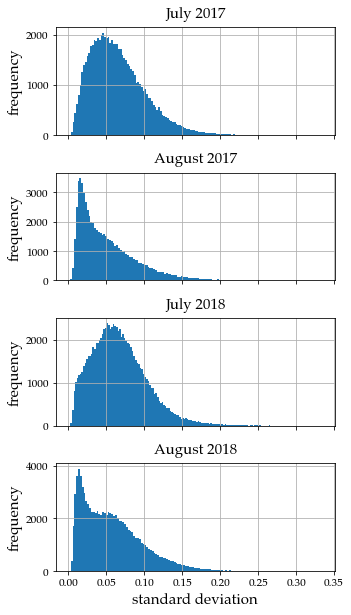

In [11]:
fig, axs = plt.subplots(4, 1, figsize=(5, 10),
                       sharex='col', sharey='row',
                       # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});

(ax1, ax2, ax3, ax4) = axs;
ax1.grid(True); ax2.grid(True)
ax3.grid(True); ax4.grid(True)

################
################  July 2017
################
_ = ax1.hist(July_2017['NDVI_max'], bins='auto');
ax1.set_title("July 2017");
ax1.set_ylabel("frequency")

################
################  August 2017
################
_ = ax2.hist(Aug_2017['NDVI_max'], bins='auto');
ax2.set_title("August 2017");
ax2.set_ylabel("frequency")

################
################  July 2018
################
_ = ax3.hist(July_2018['NDVI_max'], bins='auto');
ax3.set_title("July 2018");
ax3.set_ylabel("frequency")

################
################  August 2018
################
_ = ax4.hist(Aug_2018['NDVI_max'], bins='auto');
ax4.set_title("August 2018");
ax4.set_ylabel("frequency")
ax4.set_xlabel("standard deviation")

################
################  Save
################

file_name = plot_dir + "varianceHistogram_CorrectYear_NDVI.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);


In [12]:
# Filter irrigated annuals

In [13]:
July_2017 = July_2017[July_2017.CropTyp.isin(irrigatedAnnuals.CropTyp)]
Aug_2017  = Aug_2017[Aug_2017.CropTyp.isin(irrigatedAnnuals.CropTyp)]
July_2018 = July_2018[July_2018.CropTyp.isin(irrigatedAnnuals.CropTyp)]
Aug_2018  = Aug_2018[Aug_2018.CropTyp.isin(irrigatedAnnuals.CropTyp)]

July_2017=nc.filter_out_nonIrrigated(July_2017)
Aug_2017=nc.filter_out_nonIrrigated(Aug_2017)
July_2018=nc.filter_out_nonIrrigated(July_2018)
Aug_2018=nc.filter_out_nonIrrigated(Aug_2018)
July_2017.shape

(12338, 8)

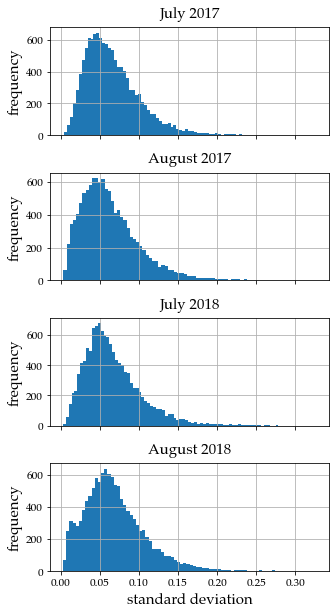

In [14]:
fig, axs = plt.subplots(4, 1, figsize=(5, 10),
                       sharex='col', sharey='row',
                       # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});

(ax1, ax2, ax3, ax4) = axs;
ax1.grid(True); ax2.grid(True)
ax3.grid(True); ax4.grid(True)

################
################  July 2017
################
_ = ax1.hist(July_2017['NDVI_max'], bins='auto');
ax1.set_title("July 2017");
ax1.set_ylabel("frequency")

################
################  August 2017
################

_ = ax2.hist(Aug_2017['NDVI_max'], bins='auto');
ax2.set_title("August 2017");
ax2.set_ylabel("frequency")

################
################  July 2018
################
_ = ax3.hist(July_2018['NDVI_max'], bins='auto');
ax3.set_title("July 2018");
ax3.set_ylabel("frequency")

################
################  August 2018
################
_ = ax4.hist(Aug_2018['NDVI_max'], bins='auto');
ax4.set_title("August 2018");
ax4.set_ylabel("frequency")
ax4.set_xlabel("standard deviation")

################
################  Save
################

file_name = plot_dir + "varianceHistogram_CorrectYear_NDVI_IrrAnnuals.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);


# Wrong Year

(174387, 8)
(174387, 8)
(178281, 8)
(178281, 8)


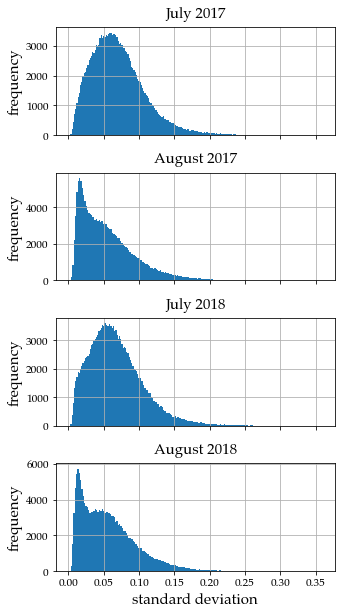

In [15]:
July_2017 = pd.read_csv(data_dir + "Eastern_WA_2017_07_variance_WrongYear.csv")
Aug_2017  = pd.read_csv(data_dir + "Eastern_WA_2017_08_variance_WrongYear.csv")
July_2018 = pd.read_csv(data_dir + "Eastern_WA_2018_07_variance_WrongYear.csv")
Aug_2018  = pd.read_csv(data_dir + "Eastern_WA_2018_08_variance_WrongYear.csv")
print (July_2017.shape)
print (Aug_2017.shape)
print (July_2018.shape)
print (Aug_2018.shape)

fig, axs = plt.subplots(4, 1, figsize=(5, 10),
                       sharex='col', sharey='row',
                       # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});

(ax1, ax2, ax3, ax4) = axs;
ax1.grid(True); ax2.grid(True)
ax3.grid(True); ax4.grid(True)

################
################  July 2017
################
_ = ax1.hist(July_2017['NDVI_max'], bins='auto');
ax1.set_title("July 2017");
ax1.set_ylabel("frequency")

################
################  August 2017
################
_ = ax2.hist(Aug_2017['NDVI_max'], bins='auto');
ax2.set_title("August 2017");
ax2.set_ylabel("frequency")

################
################  July 2018
################
_ = ax3.hist(July_2018['NDVI_max'], bins='auto');
ax3.set_title("July 2018");
ax3.set_ylabel("frequency")

################
################  August 2018
################
_ = ax4.hist(Aug_2018['NDVI_max'], bins='auto');
ax4.set_title("August 2018");
ax4.set_ylabel("frequency")
ax4.set_xlabel("standard deviation")

################
################  Save
################

file_name = plot_dir + "varianceHistogram_WrongYear_NDVI.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);


In [16]:
print (len(Aug_2018.CropTyp.unique()))
Aug_2018.CropTyp.unique()

127


array(['developed', 'apple', 'grape, wine', 'grass hay', 'fallow',
       'alfalfa hay', 'pear', 'cherry', 'pasture', 'fallow, idle',
       'blueberry', 'crp/conservation', 'onion', 'bluegrass seed',
       'unknown', 'corn, field', 'market crops', 'grape, unknown',
       'orchard, unknown', 'nursery, ornamental', 'grape, juice',
       'nectarine/peach', 'plum', 'hops', 'research station',
       'alfalfa/grass hay', 'nursery, orchard/vineyard', 'apricot',
       'sudangrass', 'corn, sweet', 'golf course', 'nursery, lavender',
       'oat hay', 'wheat', 'mint', 'timothy', 'wildlife feed', 'walnut',
       'driving range', 'pumpkin', 'bean, dry', 'dill', 'pepper',
       'potato', 'squash', 'tomato', 'asparagus', 'caneberry',
       'barley hay', 'bean, green', 'carrot seed', 'barley', 'corn seed',
       'clover seed', 'oat', 'cucumber', 'watermelon', 'alfalfa seed',
       'triticale', 'fescue seed', 'christmas tree', 'tobacco',
       'wheat fallow', 'soybean', 'legume cover', 'ca

In [17]:
print (len(irrigatedAnnuals.CropTyp.unique()))
irrigatedAnnuals.CropTyp.unique()

89


array(['allium', 'artichoke', 'barley', 'barley hay', 'bean seed',
       'bean, dry', 'bean, garbanzo', 'bean, green', 'beet', 'beet seed',
       'broccoli', 'broccoli seed', 'brussels sprouts',
       'brussels sprouts seed', 'buckwheat', 'cabbage', 'cabbage seed',
       'camelina', 'canola', 'cantaloupe', 'carrot', 'carrot seed',
       'cauliflower', 'cereal grain, unknown', 'cilantro seed',
       'corn seed', 'corn, field', 'corn, sweet', 'corn, unknown',
       'cucumber', 'flax seed', 'garlic', 'hemp', 'herb, medicinal',
       'herb, unknown', 'kale', 'lentil', 'lettuce', 'medicinal herb',
       'melon, unknown', 'mustard', 'mustard seed', 'oat', 'oat hay',
       'onion', 'onion seed', 'parsley', 'pea seed', 'pea, dry',
       'pea, green', 'pea/vetch', 'pepper', 'potato', 'potato seed',
       'pumpkin', 'quinoa', 'radish', 'radish seed', 'rye', 'rye hay',
       'ryegrass seed', 'safflower seed', 'seed, other', 'seed, unknown',
       'sorghum', 'soybean', 'spinach', 'sp

# Filter Irrigated Annuals

In [18]:
July_2017 = July_2017[July_2017.CropTyp.isin(irrigatedAnnuals.CropTyp)]
Aug_2017  = Aug_2017[Aug_2017.CropTyp.isin(irrigatedAnnuals.CropTyp)]
July_2018 = July_2018[July_2018.CropTyp.isin(irrigatedAnnuals.CropTyp)]
Aug_2018  = Aug_2018[Aug_2018.CropTyp.isin(irrigatedAnnuals.CropTyp)]

print (len(Aug_2018.ID.unique()))
July_2017=nc.filter_out_nonIrrigated(July_2017)
Aug_2017=nc.filter_out_nonIrrigated(Aug_2017)
July_2018=nc.filter_out_nonIrrigated(July_2018)
Aug_2018=nc.filter_out_nonIrrigated(Aug_2018)
len(Aug_2018.ID.unique())

93459


26823

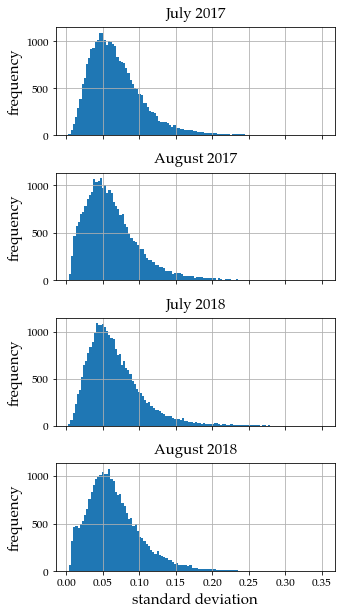

In [19]:
fig, axs = plt.subplots(4, 1, figsize=(5, 10),
                       sharex='col', sharey='row',
                       # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});

(ax1, ax2, ax3, ax4) = axs;
ax1.grid(True); ax2.grid(True)
ax3.grid(True); ax4.grid(True)

################
################  July 2017
################
_ = ax1.hist(July_2017['NDVI_max'], bins='auto');
ax1.set_title("July 2017");
ax1.set_ylabel("frequency")

################
################  August 2017
################
_ = ax2.hist(Aug_2017['NDVI_max'], bins='auto');
ax2.set_title("August 2017");
ax2.set_ylabel("frequency")

################
################  July 2018
################
_ = ax3.hist(July_2018['NDVI_max'], bins='auto');
ax3.set_title("July 2018");
ax3.set_ylabel("frequency")

################
################  August 2018
################
_ = ax4.hist(Aug_2018['NDVI_max'], bins='auto');
ax4.set_title("August 2018");
ax4.set_ylabel("frequency")
ax4.set_xlabel("standard deviation")

################
################  Save
################

file_name = plot_dir + "varianceHistogram_WrongYear_IrrAnnuals.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);
